In [1]:
# EDA Packages
import pandas as pd
import numpy as np
import random
import seaborn as sns # Graphing/Plotting module.

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load Url Data 

#urls_data = pd.read_csv("url_data.csv")


data1 = pd.read_csv("url_data.csv")
data2 = pd.read_csv("url_data_dga.csv")
data3 = pd.read_csv("url_data_scraping.csv")

urls_data = data1.append(data2, ignore_index=True)
urls_data = urls_data.append(data3, ignore_index=True)

to_csv = urls_data.to_csv("mixed_data.csv", index=False)

In [3]:
# check if there is any missing data
urls_data.isnull().any()

url      False
label    False
dtype: bool

In [4]:
# impute the data
urls_data = urls_data.fillna(method='ffill')

In [5]:
urls_data.head(10)

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
5,toddscarwash.com,bad
6,tubemoviez.com,bad
7,ipl.hk,bad
8,crackspider.us/toolbar/install.php?pack=exe,bad
9,pos-kupang.com/,bad


### divison to bad against good urls

<AxesSubplot:xlabel='label', ylabel='count'>

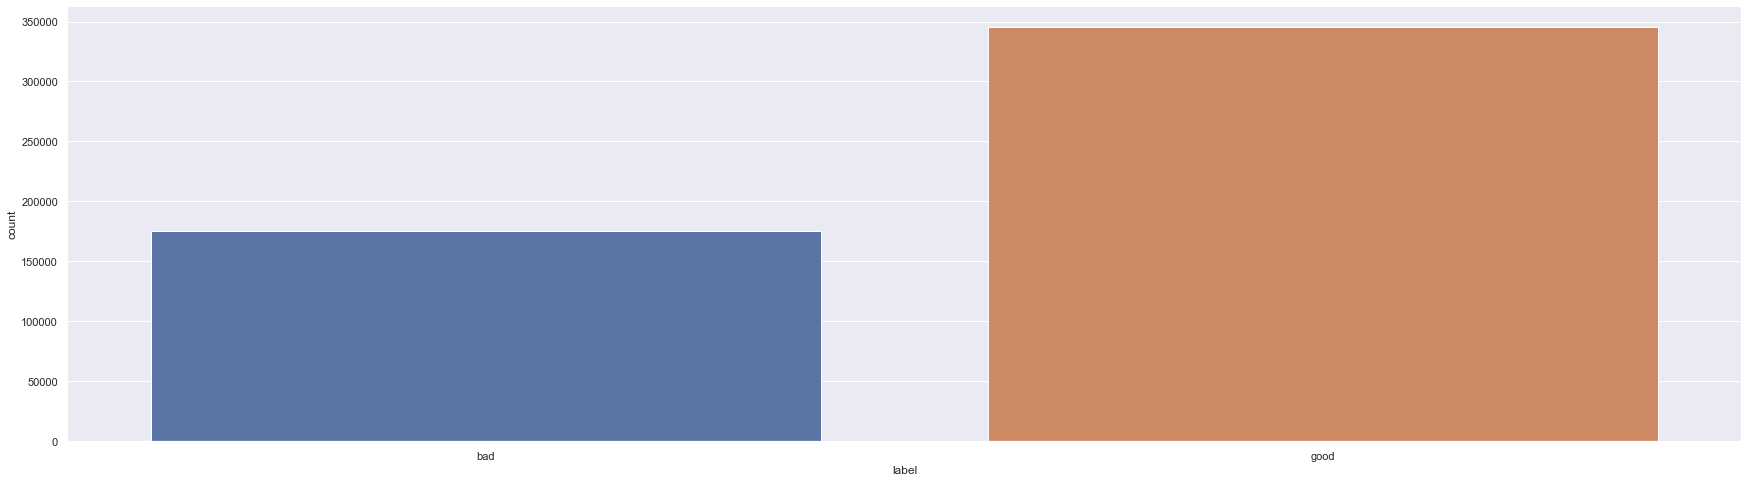

In [6]:
sns.set(rc={'figure.figsize':(30,8)})
sns.countplot(data=urls_data, x='label')

In [7]:
# Labels
y = urls_data["label"]

In [8]:
# Features
url_list = urls_data["url"]

In [9]:
url_list

0          diaryofagameaddict.com
1                espdesign.com.au
2              iamagameaddict.com
3                   kalantzis.net
4           slightlyoffcenter.net
                   ...           
520727    searchenginejournal.com
520728           depositfiles.com
520729               dribbble.com
520730            bp0.blogger.com
520731         xda-developers.com
Name: url, Length: 520732, dtype: object

## parse the url text to features

In [10]:
has_com = []
size = []
num_of_digits = []
num_of_q_mark = []
has_php = []


for column in url_list:
    size.append(len(column))
    

for column in url_list:
    if ".com" in column:
        has_com.append(1)
    else:
        has_com.append(0)

        
for column in url_list:     
    count = 0
    for char in column:
        if char.isdigit():
            count += 1
    num_of_digits.append(count)
    
    
for column in url_list:    
    count = 0
    for char in column:
        if char == '?':
            count += 1
    num_of_q_mark.append(count)    

    
for column in url_list:

    if "php" in column:
        has_php.append(1)
    else:
        has_php.append(0)
    

### url size (number of characters) 

In [11]:
url_size = pd.DataFrame(size, columns = ['url_size'])
url_size

,url_size
0,22
1,16
2,18
3,13
4,21
...,...
520727,23
520728,16
520729,12
520730,15


###  url contains .com

In [12]:
url_has_com = pd.DataFrame(has_com, columns = ['has_com'])
url_has_com

,has_com
0,1
1,1
2,1
3,0
4,0
...,...
520727,1
520728,1
520729,1
520730,1


### number of digits in the url 

In [13]:
url_num_of_digits = pd.DataFrame(num_of_digits, columns = ['num_of_digits'])
url_num_of_digits

,num_of_digits
0,0
1,0
2,0
3,0
4,0
...,...
520727,0
520728,0
520729,0
520730,1


### number of non alphabet characters in the url 

In [14]:
non_alpha = pd.DataFrame(urls_data["url"].str.count(r'[^a-zA-Z0-9 ]'))
non_alpha.columns = ['non_alpha']
non_alpha

,non_alpha
0,1
1,2
2,1
3,1
4,1
...,...
520727,1
520728,1
520729,1
520730,2


### number of ? in the url

In [15]:
num_of_q_mark = pd.DataFrame(num_of_q_mark, columns = ["num_of_q_mark"])
num_of_q_mark

,num_of_q_mark
0,0
1,0
2,0
3,0
4,0
...,...
520727,0
520728,0
520729,0
520730,0


### url contins 'php' 

In [16]:
url_has_php = pd.DataFrame(has_php, columns = ['has_php'])
url_has_php

,has_php
0,0
1,0
2,0
3,0
4,0
...,...
520727,0
520728,0
520729,0
520730,0


### number of routes in the url ( / ) 

In [17]:
num_of_routes = pd.DataFrame(urls_data["url"].str.count('/'))
num_of_routes.columns = ['num_of_routes']
num_of_routes.head(10)

,num_of_routes
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,1


### number of '.' in the url

In [18]:
num_of_dots = pd.DataFrame(urls_data["url"].str.count(r"\."))
num_of_dots.columns = ['num_of_dots']
num_of_dots.head(10)

,num_of_dots
0,1
1,2
2,1
3,1
4,1
5,1
6,1
7,1
8,2
9,1


### url contins 'login/server/client/admin' 

In [19]:
contains_login = pd.DataFrame(urls_data["url"].str.count('login'))

contains_login.columns = ['contains_login']
contains_login.loc[(contains_login['contains_login'] > 0)]

,contains_login
727,1
1454,1
1758,1
1768,1
1810,1
...,...
419884,1
419950,1
419952,1
419957,1


In [20]:
contains_client = pd.DataFrame(urls_data["url"].str.count('client'))

contains_client.columns = ['contains_client']
contains_client.loc[(contains_client['contains_client'] > 0)]

,contains_client
805,1
806,1
1045,1
1179,1
1180,1
...,...
413127,1
413131,1
413185,1
413188,1


In [21]:
contains_admin = pd.DataFrame(urls_data["url"].str.count('admin'))

contains_admin.columns = ['contains_admin']
contains_admin.loc[(contains_admin['contains_admin'] > 0)]

,contains_admin
11,1
371,1
702,1
703,1
1387,1
...,...
419995,1
419996,1
420000,1
420001,1


In [22]:
contains_server = pd.DataFrame(urls_data["url"].str.count('server'))

contains_server.columns = ['contains_server']
contains_server.loc[(contains_server['contains_server'] > 0)]

,contains_server
216,1
446,1
470,1
492,1
713,1
...,...
418626,1
419910,1
419914,1
420438,1


### url contians ip

In [23]:

contains_ip = pd.DataFrame(urls_data["url"].str.count(r"^((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])\.){3}(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])$"))

contains_ip.columns = ['contains_ip']
contains_ip.loc[(contains_ip['contains_ip'] > 0)]

,contains_ip
5743,1
10030,1
27423,1
30597,1
391876,1
392811,1
394080,1
394084,1
394085,1
394088,1


### number of fragments in the url  

In [24]:
num_of_fragments = pd.DataFrame(urls_data["url"].str.count('\#'))

num_of_fragments.columns = ['num_of_fragments']
num_of_fragments.loc[(num_of_fragments['num_of_fragments'] > 0)]

,num_of_fragments
2623,1
3225,1
3661,1
4058,1
4185,1
...,...
41093,1
41219,1
42764,1
412733,1


### number of query parameters in the url

In [25]:
num_of_parameters = pd.DataFrame(urls_data["url"].str.count('\&'))

num_of_parameters.columns = ['num_of_parameters']
num_of_parameters.loc[(num_of_parameters['num_of_parameters'] > 0)]

,num_of_parameters
23,3
136,1
193,6
227,1
228,1
...,...
420449,6
420450,6
420451,6
420456,6


### url contains 'exe'

In [26]:

contains_exe = pd.DataFrame(urls_data["url"].str.count("exe"))

contains_exe.columns = ['contains_exe']
contains_exe.loc[(contains_exe['contains_exe'] > 0)]

,contains_exe
8,1
68,1
78,1
79,1
182,1
...,...
515277,1
515759,1
515965,1
517892,1


## create a model 

In [27]:
X = [url_size["url_size"], url_has_com["has_com"], url_num_of_digits["num_of_digits"], non_alpha["non_alpha"],
    num_of_q_mark["num_of_q_mark"], url_has_php["has_php"], num_of_routes['num_of_routes'], num_of_dots['num_of_dots'],
    contains_login["contains_login"], contains_client["contains_client"], contains_admin["contains_admin"],
    contains_server["contains_server"], contains_ip["contains_ip"], num_of_fragments["num_of_fragments"],
    num_of_parameters["num_of_parameters"], contains_exe["contains_exe"]]

headers = ["url_size", "has_com", "num_of_digits", "non_alpha", "num_of_q_mark", "has_php", "num_of_routes", "num_of_dots",
          "contains_login", "contains_client", "contains_admin", "contains_server", "contains_ip", "num_of_fragments",
          "num_of_parameters", "contains_exe"]

X = pd.concat(X, axis=1, keys=headers)
X

,url_size,has_com,num_of_digits,non_alpha,num_of_q_mark,has_php,num_of_routes,num_of_dots,contains_login,contains_client,contains_admin,contains_server,contains_ip,num_of_fragments,num_of_parameters,contains_exe
0,22,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,16,1,0,2,0,0,0,2,0,0,0,0,0,0,0,0
2,18,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,21,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520727,23,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
520728,16,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
520729,12,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
520730,15,1,1,2,0,0,0,2,0,0,0,0,0,0,0,0


In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Model Building
#using logistic regression
logit = LogisticRegression()	
logit.fit(X_train, y_train)

C:\Users\orenl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators = 100)
randomForest.fit(X_train, y_train)

RandomForestClassifier()

### test the model 

In [31]:
# Accuracy of Our Model
print("Accuracy logistic regression: ",logit.score(X_test, y_test))
print("Accuracy RandomForest: ",randomForest.score(X_test, y_test))

Accuracy logistic regression:  0.8639999231854975
Accuracy RandomForest:  0.9337186860879334


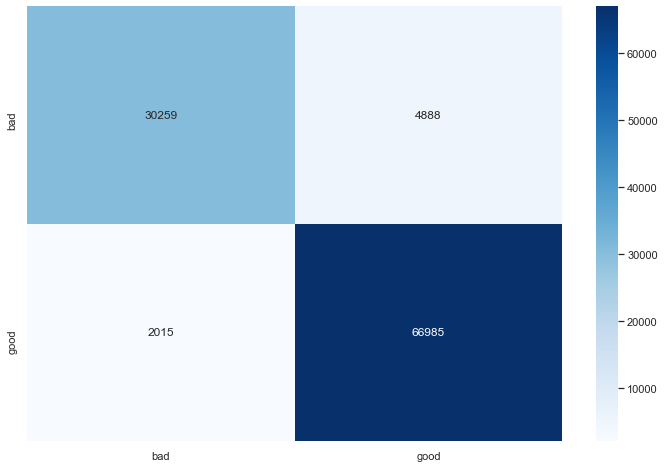

In [32]:

from sklearn.metrics import confusion_matrix, classification_report

predictions = randomForest.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)

sns.set(rc={'figure.figsize':(12,8)})
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

In [34]:
import pickle
# now you can save it to a file
with open('url_model.pkl', 'wb') as f:
    pickle.dump(randomForest, f)
